In [22]:
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
import pandas as pd
import matplotlib.pyplot as plt
import yellowbrick
from yellowbrick.cluster import KElbowVisualizer
from sklearn.metrics import silhouette_score
import seaborn as sns; sns.set()

In [2]:
ds = pd.read_csv("C:/Users/tvpia/Desktop/Final project/final-project/your-project/Datasets/ds_flagged.csv")
pd.set_option('max_columns', 150)

In [3]:
ds.drop(columns="Unnamed: 0",inplace=True)

Using unsupervising learning and K-means model, let's cluster our data.
I will proceed to do so in 2 different ways.

The first way is to use only psychological features to determine cluster. (it may be more interesting for later on exploratory analysis).

The second way is to use all the features possible (since there are too many countries (> 160) to label encode efficiently. I will divide between English speaking and non English speaking countries.

As a first step, let's standard scale the columns that need to (age and accuracy)

In [4]:
ds_std = ds.copy()

In [5]:
features = ds_std[['age','accuracy']]

# Standardize features
scaler = StandardScaler()
features_std = scaler.fit_transform(features)

ds_std[['age','accuracy']]=features_std

Now let's add the results of the dirty dozens tests in the table

In [7]:
ds_std["DDPScale"]= round(ds_std.iloc[:,10:14].sum(axis=1)*5/100,2)

In [8]:
ds_std["DDMScale"]= round(ds_std.iloc[:,18:22].sum(axis=1)*5/100,2)

In [9]:
ds_std.head(1)

,HSNS1,HSNS2,HSNS3,HSNS4,HSNS5,HSNS6,HSNS7,HSNS8,HSNS9,HSNS10,DDP1,DDP2,DDP3,DDP4,DDN1,DDN2,DDN3,DDN4,DDM1,DDM2,DDM3,DDM4,age,gender,accuracy,country,HSNScale,HSNS1_flag,HSNS2_flag,HSNS3_flag,HSNS4_flag,HSNS5_flag,HSNS6_flag,HSNS7_flag,HSNS8_flag,HSNS9_flag,HSNS10_flag,DDP1_flag,DDP2_flag,DDP3_flag,DDP4_flag,DDN1_flag,DDN2_flag,DDN3_flag,DDN4_flag,DDM1_flag,DDM2_flag,DDM3_flag,DDM4_flag,DDPScale,DDMScale
0,2,4,5,1,4,5,4,3,3,2,1,1,4,4,2,1,1,1,1,2,2,1,1.03349,2,0.900357,PT,0.62,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.5,0.3


## 1) Clustering with only psychological features


Lets use the elbow method to find the optimal number of clusters

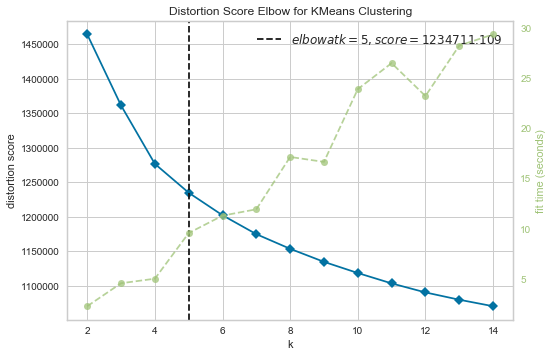

In [11]:
features = ds_std.drop(columns=["age","gender","accuracy","country"],axis=1)


model = KMeans()
visualizer = KElbowVisualizer(model, k=(2,15))
visualizer.fit(features)
visualizer.poof()

In [13]:
#lets try with k=5 first as the Elbow test tells us so
n_clusters = 5
cluster = KMeans(n_clusters=n_clusters, random_state=0, n_jobs=-1)
features = ds_std.drop(columns=["age","gender","accuracy","country"],axis=1)


model = cluster.fit(features)


preds = cluster.fit_predict(features)
centers = cluster.cluster_centers_
print(centers)

score = silhouette_score (features, preds, metric='euclidean')
print (f"For n_clusters = {n_clusters}, silhouette score is {score})")

[[3.51244015e+00 1.92657966e+00 2.83100178e+00 2.77457516e+00
  3.61205521e+00 4.14327293e+00 2.62041123e+00 3.37667825e+00
  3.36494226e+00 2.98413295e+00 3.61637405e+00 3.18157919e+00
  3.77532626e+00 4.09144681e+00 3.16608769e+00 2.55224862e+00
  2.87616186e+00 2.45685851e+00 3.44380809e+00 3.93549901e+00
  3.31921885e+00 2.95239884e+00 5.63239132e-01 2.91052483e-03
  7.04159234e-03 4.13106751e-03 6.38437705e-03 3.28607642e-03
  4.50661910e-03 4.97605859e-03 3.47385222e-03 3.84940381e-03
  2.81663694e-03 2.15942165e-03 4.03717961e-03 3.19218853e-03
  2.62886114e-03 8.16824711e-03 7.60491973e-03 6.29048916e-03
  4.97605859e-03 2.34719745e-03 1.59609426e-03 1.78387006e-03
  3.09830063e-03 7.33236316e-01 6.82546240e-01]
 [3.72113355e+00 3.66912873e+00 3.73032861e+00 2.40631595e+00
  2.60189931e+00 3.75173349e+00 3.80336147e+00 2.73914682e+00
  3.80637624e+00 1.93088634e+00 1.75218571e+00 1.76183298e+00
  2.28723244e+00 3.47166114e+00 3.89078987e+00 3.33592101e+00
  2.82325897e+00 2.298

In [17]:
#let's apply this label to the dataframe

ds['label_psy_only'] = model.labels_

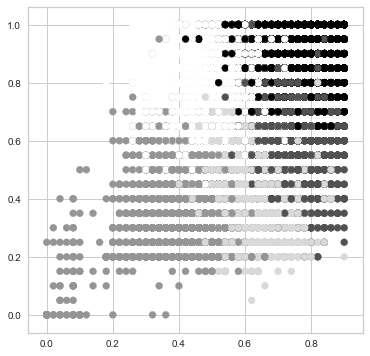

In [20]:
#lets visualize the cluster in a scatter plot


# Your code here:
plt.figure(figsize=(6,6))
plt.scatter(ds_std.HSNScale, ds_std.DDPScale, c=ds.label_psy_only) #customers.Grocery, customers.Fresh, c=customers.labels)
plt.show()



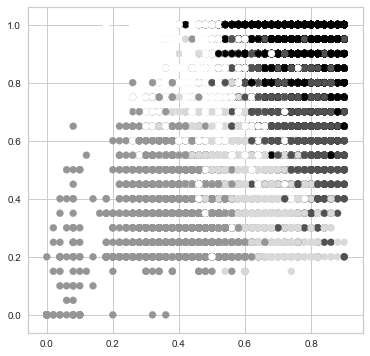

In [21]:
# Your code here:
plt.figure(figsize=(6,6))
plt.scatter(ds_std.HSNScale, ds_std.DDMScale, c=ds.label_psy_only) #customers.Grocery, customers.Fresh, c=customers.labels)
plt.show()



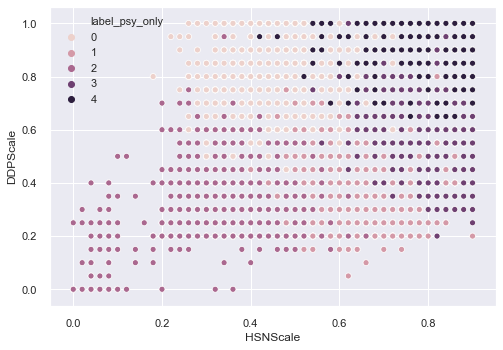

In [24]:


X = ds_std.HSNScale
y = ds_std.DDPScale


palette = sns.cubehelix_palette(5)
sns.scatterplot(X, y, hue = ds['label_psy_only'], palette = palette)
plt.show()



In [ ]:
#try visualize in 3D



## 2) Clustering with all the features

First, let's define English and non English speaking countries